In [1]:
#!/usr/bin/python

import numpy as np
import math
from astropy.io import fits as fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from pandas import DataFrame, Series
from astropy.wcs import WCS as WCS

import import_ipynb
import Pipe3D_Asier_Test as Pipe3D

from mpdaf.obj import hms2deg
from mpdaf.obj import dms2deg

from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

importing Jupyter notebook from Pipe3D_Asier_Test.ipynb


In [2]:
line = 'ASASSN13an'

In [18]:
df = pd.read_csv('Amusing_Table_true.csv')  # To find the Galaxy data
Names_1 = df['SN_name']
Names_2 = df['def_name']
R = 0

for names in Names_1:              # Finding the Galaxy in the DataFrame
    R=R+1
    if line == names:
        Row = R-1
R = 0
for names in Names_2:              # Some Galaxies have the name in other column
    R=R+1
    if line == names:
        Row = R-1

# Pixel de la SN
Pix_X = df.at[Row,'SNX'] -1
Pix_Y = df.at[Row,'SNY'] -1
# Pixel del centro de la Galaxia
Pix_X_GAL = df.at[Row,'GALX'] -1
Pix_Y_GAL = df.at[Row,'GALY'] -1

# Supernova type
if df.at[Row,'SN_type'] == 'Ia':
    SN_TYPE = 1
elif df.at[Row,'SN_type'] == 'II':
    SN_TYPE = 2
else:
    SN_TYPE = 0

In [20]:
    # SN coordinates
    RA_SN = df.at[Row,'RA_SN']
    RA_SN = hms2deg(RA_SN)
    
    DEC_SN = df.at[Row,'DEC_SN']
    DEC_SN = dms2deg(DEC_SN)
    
    # Galaxy center coordinates
    RA_GAL = df.at[Row,'RA_GAL']
    RA_GAL = hms2deg(RA_GAL)
    
    DEC_GAL = df.at[Row,'DEC_GAL']
    DEC_GAL = dms2deg(DEC_GAL)
    
    # Pixel position
    w = WCS('../Data/Amusing/flux_elines.'+line+'.cube.fits')
    Pix_X, Pix_Y ,z = w.wcs_world2pix(RA_SN, DEC_SN, 0. , 0,ra_dec_order=True)
    Pix_X_GAL, Pix_Y_GAL ,z = w.wcs_world2pix(RA_GAL, DEC_GAL, 0. , 0,ra_dec_order=True)
    
    # Integer for measure
    Pix_X = int(Pix_X)
    Pix_Y = int(Pix_Y)

TypeError: cannot concatenate 'str' and 'instance' objects

In [5]:
print(RA_SN,RA_GAL,DEC_SN,DEC_GAL)

(206.401, 206.402, -7.32572, -7.3263)


In [6]:
hms2deg(df.at[Row,'RA_pointing'])

206.404

In [7]:
w

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'LINEAR'  
CRVAL : 206.402196  -7.3256100000000002  4750.1533203125  
CRPIX : 162.18743547549801  159.705469440814  1.0  
CD1_1 CD1_2 CD1_3  : -5.5555555555555599e-05  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  5.5555555555555599e-05  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.25  
NAXIS    : 324 326

In [8]:
# Call to Pipe3D code
line = Pipe3D.Pipe3D_galaxy(line)

# Obtain the maps for the galaxy
line.painting_galaxy_maps(False, 1.0, 0.0, 0.1)

In [9]:
    # Gaussian function
    stddev = 7
    gauss = Gaussian2DKernel(stddev)
    
    # Gaussian convolve
    line.mass_density_map = convolve(line.mass_density_map, gauss)
    line.SNII_rate_map = convolve(line.SNII_rate_map, gauss)
    line.SNIa_rate_map = convolve(line.SNIa_rate_map, gauss)

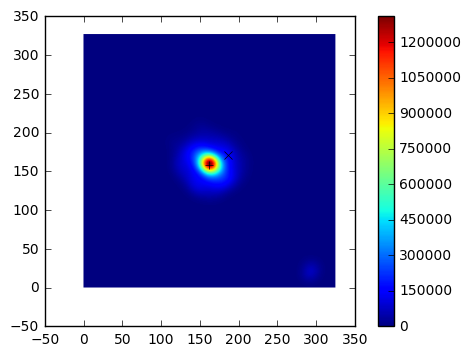

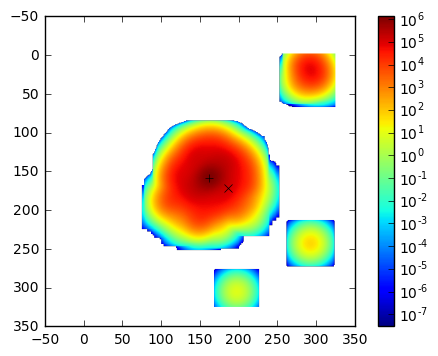

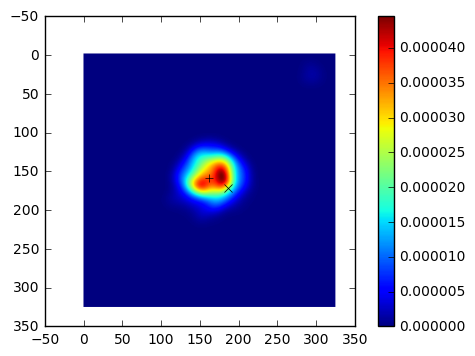

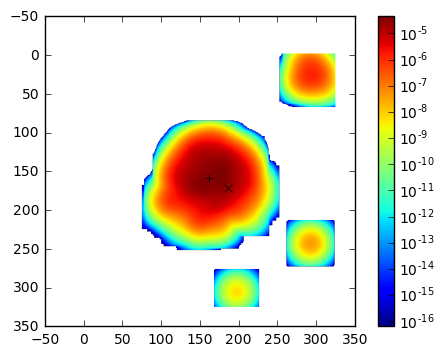

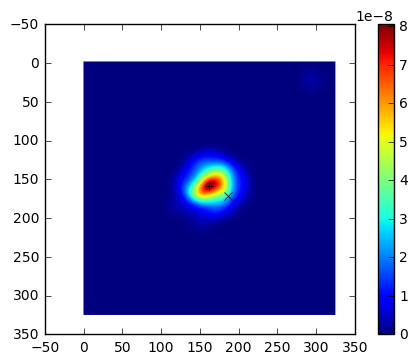

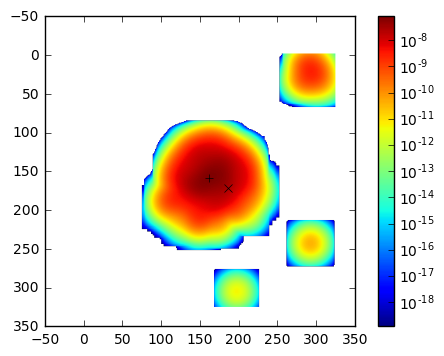

In [19]:
# Pintar Masa
plt.imshow(line.mass_density_map,origin='lower')
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
#plt.xlim(320,327)
#plt.ylim(320,327)
plt.savefig('../result/'+line.name+'_mass_density_map.png')
plt.show()
plt.close()

# Pintar Masa Log
plt.imshow(line.mass_density_map, norm=LogNorm())
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
plt.savefig('../result/'+line.name+'_mass_density_map_Log.png')
plt.show()
plt.close()

# Pintar SN II
plt.imshow(line.SNII_rate_map)
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
plt.savefig('../result/'+line.name+'_SNII_rate_map.png')
plt.show()
plt.close()

# Pintar SN II Log
plt.imshow(line.SNII_rate_map, norm=LogNorm())
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
plt.savefig('../result/'+line.name+'_SNII_rate_map_Log.png')
plt.show()
plt.close()

# Pintar SN Ia
plt.imshow(line.SNIa_rate_map)
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
plt.savefig('../result/'+line.name+'_SNIa_rate_map.png')
plt.show()
plt.close()

# Pintar SN Ia Log
plt.imshow(line.SNIa_rate_map, norm=LogNorm())
plt.colorbar()
plt.plot([Pix_X_GAL],[Pix_Y_GAL],'k+')
plt.plot([Pix_X],[Pix_Y],'kx')
plt.savefig('../result/'+line.name+'_SNIa_rate_map_Log.png')
plt.show()
plt.close()

In [11]:
print(Pix_X_GAL,Pix_Y_GAL)
print(Pix_X,Pix_Y)

(array(164.68663292885208), array(146.28546867692978))
(182, 156)


In [12]:
print(Pix_X_GAL,Pix_Y_GAL)
print(Pix_X,Pix_Y)

(array(164.68663292885208), array(146.28546867692978))
(182, 156)


In [13]:
print(line.SNIa_rate_map.shape)

(326, 324)
